In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

treino = treino.drop(columns=['media_receita','media_despesa','nome', 'sequencial_candidato'])

In [3]:
numeric_feats = treino.dtypes[treino.dtypes != "object"].index

numeric_feats = numeric_feats.drop('ano')
numeric_feats = numeric_feats.drop('situacao')

treino[numeric_feats] = np.log1p(treino[numeric_feats])

teste[numeric_feats] = np.log1p(teste[numeric_feats])

In [4]:
treino_X = treino.loc[:,:'ocupacao']
treino_Y = treino.loc[:,'situacao']

In [5]:
treino_X = pd.get_dummies(treino_X)

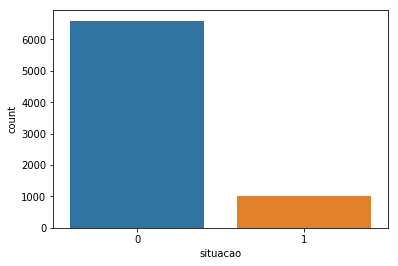

In [6]:
sns.countplot(treino_Y)

É clara a diferença entre a quantidade de instâncias da classe nao_eleito e eleito. Isso pode levar o modelo a aprender de forma errada a classificar os exemplos de teste.

Para balancear as classes usarei a técnica de under-sampling, cluser centroids.

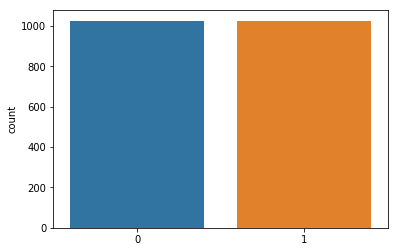

In [7]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
x_cc, y_cc = cc.fit_sample(treino_X, treino_Y)

sns.countplot(y_cc)

Com a mesma quantidade de instâncias entre as duas classes, a chance de o modelo sofrer de unerfiting é bem menor.

A seguir inicio o treinamento de alguns modelos a partir dos dados filtrados.

## Regressão Logística

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics

def cv_report(model, predictors, outcome, nfolds):
    
    kf = KFold(n_splits=nfolds, random_state=1)
    error = []
    precisions = []
    recalls = []
    f1 = []
    for train, validation in kf.split(predictors):
        train_predictors = (predictors[train,:])
        train_target =  outcome[train]
        model.fit(train_predictors, train_target)
        
        y = model.predict(predictors[validation,:])
        report = metrics.classification_report(outcome[validation], y, output_dict=True)
        error.append(report)
    return error

In [35]:
from sklearn.linear_model import LogisticRegression

lambdas = np.arange(0.1,1,0.1).tolist()
lrModel = LogisticRegression(random_state=1, solver="lbfgs", max_iter=10000)

cv_logRegression = cv_report(lrModel,predictors=x_cc,outcome=y_cc,nfolds=5)

[ 411  412  413 ... 2049 2050 2051]


/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[   0    1    2 ... 2049 2050 2051]


/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[   0    1    2 ... 2049 2050 2051]
[   0    1    2 ... 2049 2050 2051]


/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[   0    1    2 ... 1639 1640 1641]


/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/renato/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [27]:
print(cv_logRegression[0])

{'0': {'precision': 1.0, 'recall': 0.8491484184914841, 'f1-score': 0.9184210526315789, 'support': 411}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'micro avg': {'precision': 0.8491484184914841, 'recall': 0.8491484184914841, 'f1-score': 0.8491484184914841, 'support': 411}, 'macro avg': {'precision': 0.5, 'recall': 0.4245742092457421, 'f1-score': 0.45921052631578946, 'support': 411}, 'weighted avg': {'precision': 1.0, 'recall': 0.8491484184914841, 'f1-score': 0.9184210526315789, 'support': 411}}


In [ ]:
lgReg = LogisticRegression(random_state=1, solver="lbfgs", max_iter=10000)
lgReg.fit(x_cc,y_cc)
print(lgReg.predict(treino_X))


In [ ]:
cv_logRegression.plot(title = "Cross validation - Regressão logística")
plt.xlabel("lambda")
plt.ylabel("rmse")
plt.show()